In [2]:
#OS
import os 
#Data handling
import numpy as np
#visualzation
import matplotlib.pyplot as plt
#dataset
import pandas as pd
from sklearn.datasets import fetch_openml
# Model selection and evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.metrics import confusion_matrix

#classification
from sklearn.neighbors import KNeighborsClassifier
#Model persistence
from joblib import dump,load

Data loading

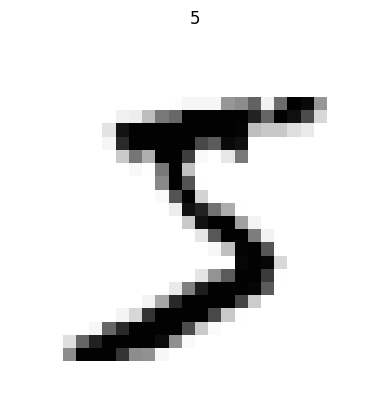

In [5]:
minst = fetch_openml("mnist_784", version=1, as_frame=False)
x,y =minst.data,minst.target

#data visual
some_data = x[0]
plt.title(y[0])
plt.axis(False)
plt.imshow(some_data.reshape(28,28), cmap='Greys')#5
plt.show()
y = np.uint8(y)#Change the data int
X_train,x_test,Y_train,y_test=x[:60000],x[60000:],y[:60000],y[60000:]#Prep the data

Model_train

In [6]:
def score(model_score,X_test,y_test):
    model = model_score.predict(X_test)
    print("accuracy",accuracy_score(model,y_test))
    print("precision",precision_score(model,y_test,average='macro'))
    print("recall_score",recall_score(model,y_test,average='macro'))
def error(model,y_train):
    conf =confusion_matrix(y_train,model)
    print(conf)
    plt.matshow(conf,cmap="binary")#The model is diagonal

    
    
    

In [24]:
KNC =KNeighborsClassifier()
KNC.fit(X_train,Y_train)
param_grid=[{"n_neighbors":[3,45],"weights":['uniform', 'distance']}]
GR=GridSearchCV(KNC,param_grid,cv=5)#grid search
GR.fit(X_train,Y_train)
best_model =GR.best_estimator_#using the best model
model_score=cross_val_score(best_model,X_train,Y_train,cv=3)#score
model_predict=cross_val_predict(best_model,X_train,Y_train,cv=3)#predict


In [25]:
score(KNC,X_train,Y_train)
print(model_score)


0.9819166666666667
0.9816465482044595
0.982207665120935
[0.9704 0.9689 0.9687]


[[5880    3    4    0    0    4   20    1    6    5]
 [   1 6703   10    2    3    1    3   11    4    4]
 [  42   47 5709   18   10    4   10   89   20    9]
 [   9   13   32 5899    1   68    4   40   41   24]
 [   3   51    1    1 5632    1   14   12    3  124]
 [  16    7    5   75    4 5205   60    7   17   25]
 [  19   10    1    1    6   20 5857    0    4    0]
 [   3   59   13    3   19    3    0 6093    4   68]
 [  19   71   11   70   29   95   28   14 5454   60]
 [  15   10    4   33   47   13    3   84   12 5728]]


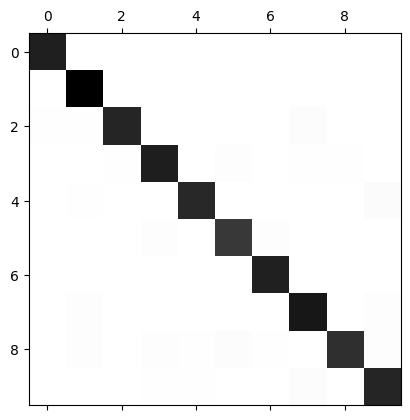

In [26]:
error(model_predict,Y_train)

#Model output

In [27]:
os.makedirs("models", exist_ok=True)
dump(KNC,"models/KNCmodel.pkl")

['models/KNC_model.pkl']